In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import joblib

import spacy
import contractions
import string
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import swifter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from multiprocessing import Pool
from sklearn.feature_extraction.text import HashingVectorizer


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('E:/FakeNewsCorpus_Sample_100k.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   100000 non-null  int64 
 1   text    100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = preprocessing.normalize(X_train_bow)
X_test_bow = preprocessing.normalize(X_test_bow)

In [7]:
# -------------- Grid Search CV --------------

#testing_parameters = { 
#                        'n_estimators': [50,100,200,300],
#                        'criterion': ['gini', 'entropy'],
#                        'max_depth': [4,6,8,10],
 #                                         }
#
#model_random_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=testing_parameters, cv=5)
#model_random_search.fit(X_train_bow, y_train)

#print("The most optimal parameters for RandomForestClassifier are: ",model_random_search.best_params_)
#print("The precision that model can reach for the current model",model_random_search.best_score_*100) 

#The most optimal parameters for RandomForestClassifier are:  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
#The precision that model can reach for the current model 85.31977453749546

In [8]:
RFC = RandomForestClassifier(criterion='entropy', max_depth= 10, n_estimators= 300)
RFC.fit(X_train_bow, y_train)

prd_RFC = RFC.predict(X_test_bow)

In [9]:
print(classification_report(y_test, prd_RFC))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     16392
           1       0.99      0.73      0.84     13608

    accuracy                           0.87     30000
   macro avg       0.90      0.86      0.87     30000
weighted avg       0.89      0.87      0.87     30000



In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [11]:
binary_predictions = []

for i in prd_RFC:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.8715666666666667
Precision on testing set: 0.7253086419753086
Recall on testing set: 0.9884827240861291


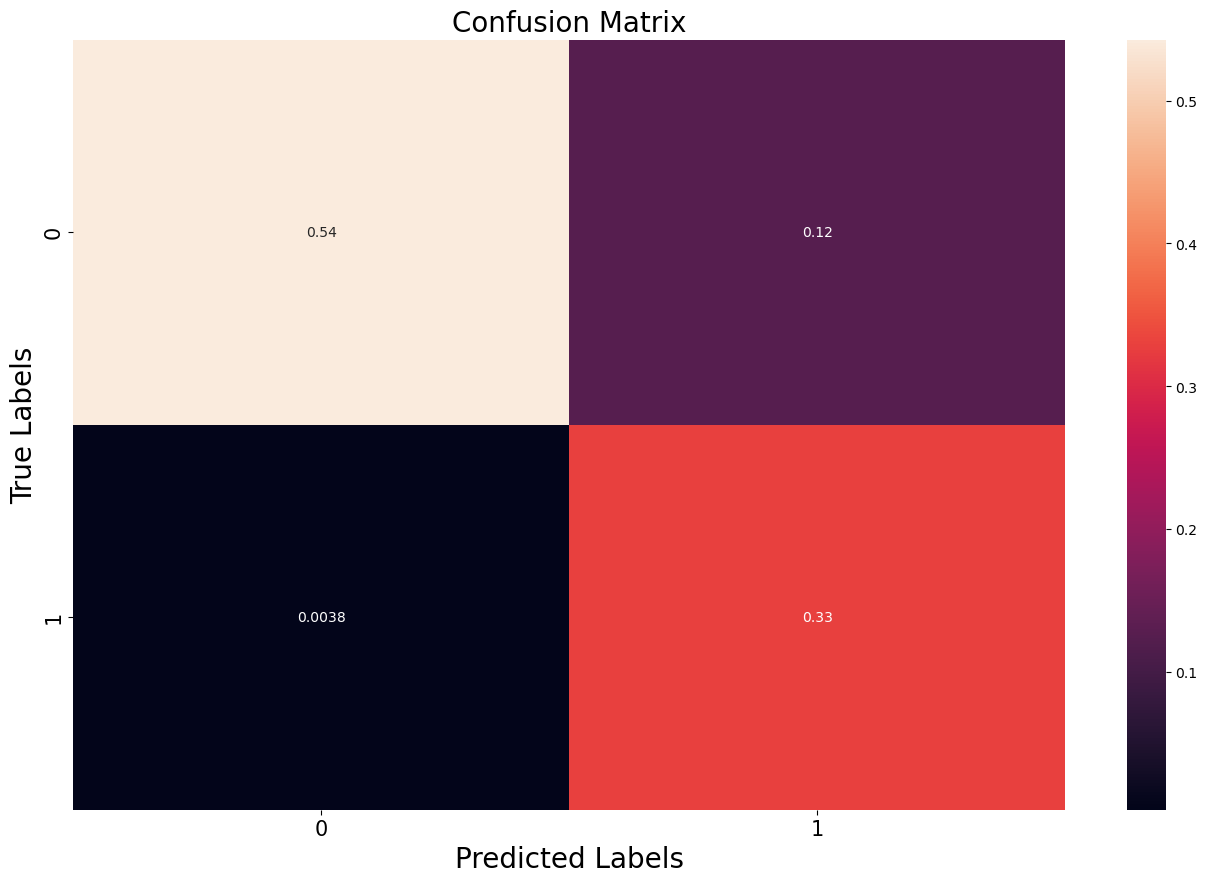

In [12]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

In [ ]:
prd_df = pd.read_csv('/WELFake_Cleaned.csv')

prd_df.dropna(inplace=True)

val_text = prd_df['text']
val_label = prd_df['label']

In [15]:
val_text_bow = vectorizer.transform(val_text)

val_text_bow = preprocessing.normalize(val_text_bow)

In [16]:
pred = RFC.predict(val_text_bow)

In [17]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.5700088308265934
Precision on testing set: 0.17725945916175578
Recall on testing set: 0.8895798783858485


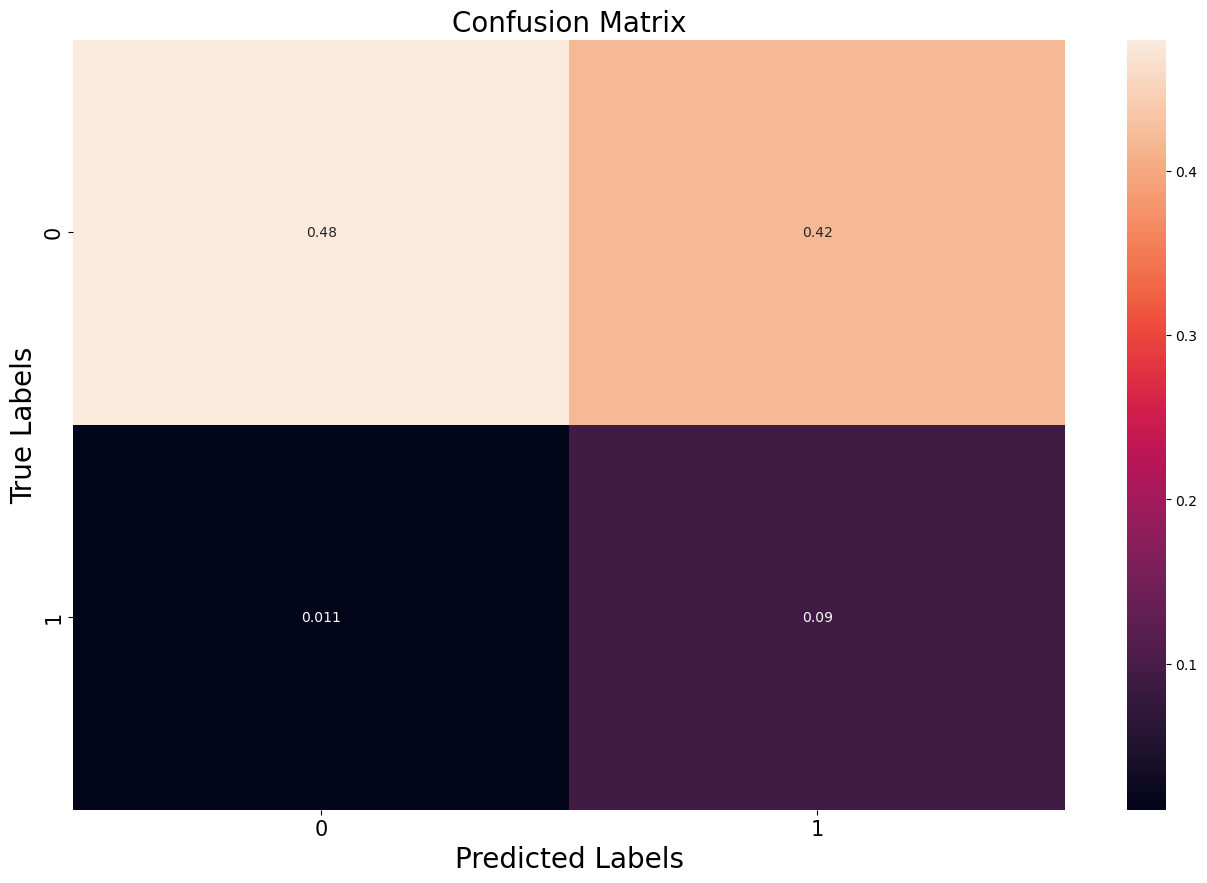

In [18]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [19]:
print("Fake News Corpus Classification Report on WELFake set (Using RFC)\n")
print(classification_report(binary_predictions, val_label))

Fake News Corpus Classification Report on WELFake set (Using RFC)

              precision    recall  f1-score   support

           0       0.98      0.53      0.69     64105
           1       0.18      0.89      0.30      7236

    accuracy                           0.57     71341
   macro avg       0.58      0.71      0.49     71341
weighted avg       0.90      0.57      0.65     71341



Accuracy on testing set: 0.5582883674237671
Precision on testing set: 0.027619589977220957
Recall on testing set: 0.4801980198019802


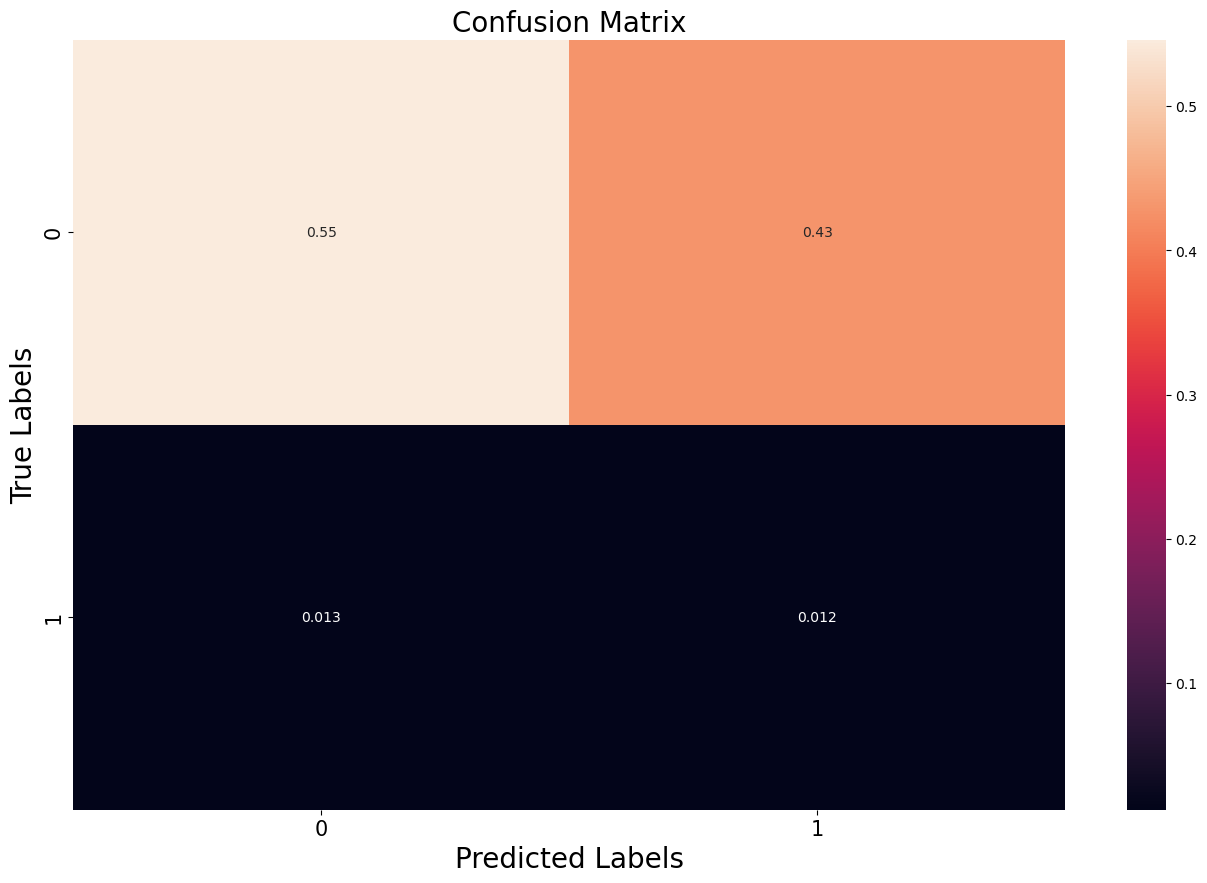

In [ ]:
liar_df = pd.read_csv('/Liar_preprocessed_nolemma.csv')

liar_text = liar_df['text']
liar_label = liar_df['Label']

liar_text_bow = vectorizer.transform(liar_text)

liar_text_bow = preprocessing.normalize(liar_text_bow)

pred_liar = RFC.predict(liar_text_bow)

binary_predictions_liar = []

for i in pred_liar:
    if i >= 0.5:
        binary_predictions_liar.append(1)
    else:
        binary_predictions_liar.append(0) 
        
matrix = confusion_matrix(binary_predictions_liar, liar_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_liar, liar_label))
print('Precision on testing set:', precision_score(binary_predictions_liar, liar_label))
print('Recall on testing set:', recall_score(binary_predictions_liar, liar_label))

In [21]:
print("Fake News Corpus Classification Report on LIAR set (Using RFC)\n")
print(classification_report(binary_predictions_liar, liar_label))

Fake News Corpus Classification Report on LIAR set (Using RFC)

              precision    recall  f1-score   support

           0       0.98      0.56      0.71      7767
           1       0.03      0.48      0.05       202

    accuracy                           0.56      7969
   macro avg       0.50      0.52      0.38      7969
weighted avg       0.95      0.56      0.70      7969

